In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
!pip install kneed

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works. 

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv

In [3]:
# load dataset and show the first five sample
link = 'https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Mall_Customers.csv'
dt = pd.read_csv(link)
dt

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
# describe data
dt.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Preprocessing

For this case study, we only use income and spending score 

In [11]:
# create new dataframe that consist only annual income and spending score
newdt = dt[["Annual Income (k$)","Spending Score (1-100)"]]


Before we analyze our data, we need to scale the data with standardization method

In [23]:
# scale dataset with standart scaler
from sklearn.preprocessing import StandardScaler

sc_scaler = StandardScaler()
dt_scaled = sc_scaler.fit_transform(newdt.to_numpy())
dt_scaled = pd.DataFrame(dt_scaled, columns=['Annual Income (k$)','Spending Score (1-100)'])
dt_scaled.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'spending'},inplace=True)
dt_scaled.head(5)

,income,spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [24]:
# get stastical information on the new dataset
newdt.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

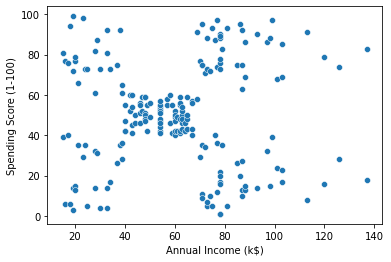

In [62]:
# Visualize the position 
import seaborn as sns
sns.scatterplot(data=newdt, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.show()


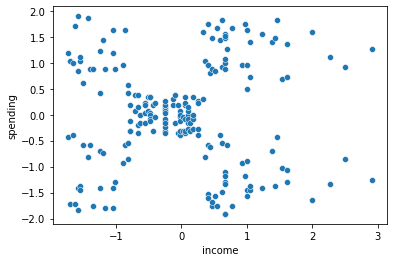

In [63]:
# Visualize the position using the original scale
sns.scatterplot(data=dt_scaled, x="income", y="spending")
plt.show()

## Clustering

### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [48]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle

model = KMeans(n_clusters=5, max_iter=300, init="random",random_state=42)
kmeans = model.fit_predict(dt_scaled)
kmeans

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 2, 4, 1, 4, 1, 4,
       2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

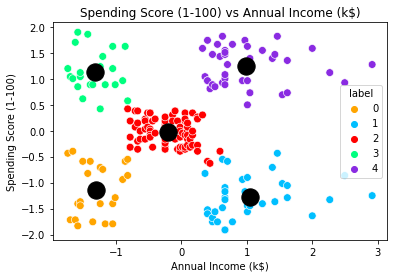

In [50]:
dt_scaled["label"] = kmeans
sns.scatterplot(x = 'income',y = 'spending',hue= "label",palette=['orange','deepskyblue','red','springgreen','blueviolet'], legend='full',data = dt_scaled  ,s = 60)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c="black", s=300, label="centroids")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

Visualize your result based on income and spending. You also can show the final position of the centroid.

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method and silhouette score

1. using elbow method

In [52]:
# set the parameter for evaluating K
wcss=[]
X2=dt_scaled[["income","spending"]]
# check the inertia for each K
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="random")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


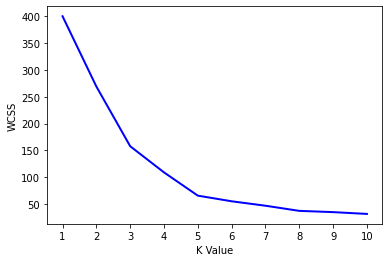

In [54]:
# manually visualize the elbow method using plotlib
plt.plot(range(1,11),wcss, linewidth=2, color="blue")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [59]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
findknee = KneeLocator(range(1,11),wcss , curve="convex", direction="decreasing")
print("the best k for your model is ",findknee.elbow)

the best k for your model is  5
